In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
buffalo_ml_path = "/Users/matthewvicario/Desktop/Project3/Output/buffalo_ml.csv"
buffalo_ml_data = pd.read_csv(buffalo_ml_path)

In [4]:
buffalo_ml_data 

,Unnamed: 0,Year,Buffalo Load,Buffalo Loss,Buffalo Pct
0,0,14,4093.0,19.0,0.464207
1,1,15,5097.0,11.0,0.215813
2,2,16,4230.0,22.0,0.520095
3,3,17,7214.0,40.0,0.554477
4,4,18,7147.0,32.0,0.447740
5,5,19,9530.0,43.0,0.451207


In [5]:
buffalo_ml_data = buffalo_ml_data[["Year","Buffalo Pct"]] 
buffalo_ml_data = buffalo_ml_data.rename(columns={"Buffalo Pct": "Buffalo_Pct"})
buffalo_ml_data

,Year,Buffalo_Pct
0,14,0.464207
1,15,0.215813
2,16,0.520095
3,17,0.554477
4,18,0.447740
5,19,0.451207


In [6]:
buffalo_ml_data["Buffalo_Pct"]=buffalo_ml_data["Buffalo_Pct"].round(4)
buffalo_ml_data

,Year,Buffalo_Pct
0,14,0.4642
1,15,0.2158
2,16,0.5201
3,17,0.5545
4,18,0.4477
5,19,0.4512


In [7]:
X = buffalo_ml_data.Year.values.reshape(-1, 1)
y = buffalo_ml_data.Buffalo_Pct
#.values.reshape(-1, 1)

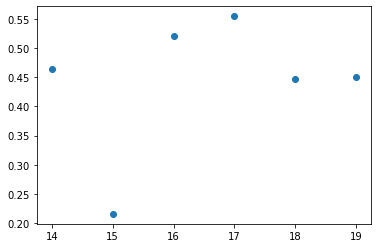

In [8]:
plt.scatter(X, y)

In [9]:
from sklearn.linear_model import LinearRegression
model =  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
model

LinearRegression()

In [10]:
model.fit(X, y)
print(model)

LinearRegression()


In [11]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [0.01900286]
y-axis intercept:  0.12870285714285723


In [12]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 0.4642
Predicted output: 0.3947428571428572
Prediction Error: -0.06945714285714283


In [13]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]


,Predicted,Actual,Error
0,0.394743,0.4642,-0.069457
1,0.413746,0.2158,0.197946
2,0.432749,0.5201,-0.087351
3,0.451751,0.5545,-0.102749
4,0.470754,0.4477,0.023054
5,0.489757,0.4512,0.038557


In [14]:
x_min = X.min()
x_max = X.max()

In [15]:
y_min_actual = y.min()
y_max_actual = y.max()

In [19]:
y_min = 0.12870285714285723 + 0.01900286* x_min
y_max = 0.12870285714285723 + 0.01900286 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 0.2158
Calculated Min Value: 0.3947428971428572
Actual Max Value: 0.5545
Calculated Max Value: 0.4897571971428572


In [20]:
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 0.2158
Predicted Min Value: [0.39474286]
Actual Max Value: 0.5545
Predicted Max Value: [0.48975714]


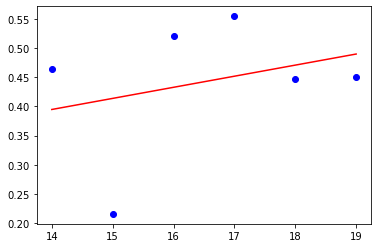

In [21]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')